# Keras Regresión

# 1.Importación librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Importación fuente de datos

In [2]:
#Lectura datos históricos
df = pd.read_excel('./viviendas_Madrid.xlsx',sheet_name='Datos_Históricos')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21742 non-null  int64  
 1   title                         21742 non-null  object 
 2   subtitle                      21742 non-null  object 
 3   sq_mt_built                   21616 non-null  float64
 4   sq_mt_useful                  8228 non-null   float64
 5   n_rooms                       21742 non-null  int64  
 6   n_bathrooms                   21726 non-null  float64
 7   n_floors                      1437 non-null   float64
 8   sq_mt_allotment               1432 non-null   float64
 9   latitude                      0 non-null      float64
 10  longitude                     0 non-null      float64
 11  raw_address                   16277 non-null  object 
 12  is_exact_address_hidden       21742 non-null  bool   
 13  s

In [4]:
df.head(5)

,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,21742,"Piso en venta en calle de Godella, 64","San CristÃ³bal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ãngeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,...,en trÃ¡mite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21740,"Piso en venta en calle del Talco, 68","San AndrÃ©s, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21739,Piso en venta en calle Pedro JimÃ©nez,"San AndrÃ©s, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,...,en trÃ¡mite,False,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,...,en trÃ¡mite,True,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0


# 3.Análisis de Datos (EDA) + Preprocesado

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21742 non-null  int64  
 1   title                         21742 non-null  object 
 2   subtitle                      21742 non-null  object 
 3   sq_mt_built                   21616 non-null  float64
 4   sq_mt_useful                  8228 non-null   float64
 5   n_rooms                       21742 non-null  int64  
 6   n_bathrooms                   21726 non-null  float64
 7   n_floors                      1437 non-null   float64
 8   sq_mt_allotment               1432 non-null   float64
 9   latitude                      0 non-null      float64
 10  longitude                     0 non-null      float64
 11  raw_address                   16277 non-null  object 
 12  is_exact_address_hidden       21742 non-null  bool   
 13  s

In [6]:
df.head(5)

,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,21742,"Piso en venta en calle de Godella, 64","San CristÃ³bal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ãngeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,...,en trÃ¡mite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21740,"Piso en venta en calle del Talco, 68","San AndrÃ©s, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21739,Piso en venta en calle Pedro JimÃ©nez,"San AndrÃ©s, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,...,en trÃ¡mite,False,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,...,en trÃ¡mite,True,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0


## 3.1 Limpieza inicial

In [4]:
df.isnull().sum() #Verificamos si hay valores nulos en alguna columna del dataframe

id                                  0
title                               0
subtitle                            0
sq_mt_built                       126
sq_mt_useful                    13514
n_rooms                             0
n_bathrooms                        16
n_floors                        20305
sq_mt_allotment                 20310
latitude                        21742
longitude                       21742
raw_address                      5465
is_exact_address_hidden             0
street_name                      5905
street_number                   15442
portal                          21742
floor                            2607
is_floor_under                   1170
door                            21742
neighborhood_id                     0
operation                           0
rent_price                          0
rent_price_by_area              21742
is_rent_price_known                 0
buy_price                           0
buy_price_by_area                   0
is_buy_price

In [5]:
#Eliminar variables que tienen un alto porcentaje de registros con el valor nulo
df_var = df.isnull().sum() #Creamos una serie de pandas con el número de valores nulos de cada variable
porcentaje_eliminacion = 0.1 #10%
df_var = df_var[df_var<porcentaje_eliminacion*len(df)] #Nos quedamos con las variables que tienen menos de un porcentaje de registros nulos
lista_variables_OK = df_var.index #Nos quedamos con el índice de la serie (los nombres de las variables de interés)
df = df[lista_variables_OK] #Filtramos el dataframe original y nos quedamos solo con las columnas de interés
df.head(5)

,id,title,subtitle,sq_mt_built,n_rooms,n_bathrooms,is_exact_address_hidden,is_floor_under,neighborhood_id,operation,rent_price,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,energy_certificate,has_parking
0,21742,"Piso en venta en calle de Godella, 64","San CristÃ³bal, Madrid",64.0,2,1.0,False,0.0,Neighborhood 135: San CristÃ³bal (1308.89 â‚¬/...,sale,471.0,False,85000,1328,True,HouseType 1: Pisos,False,0.0,D,False
1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ãngeles, Madrid",70.0,3,1.0,True,0.0,Neighborhood 132: Los Ãngeles (1796.68 â‚¬/m2...,sale,666.0,False,129900,1856,True,HouseType 1: Pisos,True,0.0,en trÃ¡mite,False
2,21740,"Piso en venta en calle del Talco, 68","San AndrÃ©s, Madrid",94.0,2,2.0,False,0.0,Neighborhood 134: San AndrÃ©s (1617.18 â‚¬/m2)...,sale,722.0,False,144247,1535,True,HouseType 1: Pisos,False,0.0,no indicado,False
3,21739,Piso en venta en calle Pedro JimÃ©nez,"San AndrÃ©s, Madrid",64.0,2,1.0,True,1.0,Neighborhood 134: San AndrÃ©s (1617.18 â‚¬/m2)...,sale,583.0,False,109900,1717,True,HouseType 1: Pisos,False,0.0,en trÃ¡mite,False
4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,2,2.0,True,0.0,Neighborhood 133: Los Rosales (1827.79 â‚¬/m2)...,sale,1094.0,False,260000,2407,True,HouseType 1: Pisos,False,0.0,en trÃ¡mite,True


In [9]:
#Eliminamos registros que tienen algún valor erróneo (se podría interpolar)

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum() #Verificamos si hay valores nulos en alguna columna del dataframe

id                         0
title                      0
subtitle                   0
sq_mt_built                0
n_rooms                    0
n_bathrooms                0
is_exact_address_hidden    0
is_floor_under             0
neighborhood_id            0
operation                  0
rent_price                 0
is_rent_price_known        0
buy_price                  0
buy_price_by_area          0
is_buy_price_known         0
house_type_id              0
is_renewal_needed          0
is_new_development         0
energy_certificate         0
has_parking                0
dtype: int64

In [9]:
df.describe().transpose() #Principales datos estadísticos del dataframe

,count,mean,std,min,25%,50%,75%,max
id,19310.0,10751.771621,6272.883675,2.0,5347.25,10575.5,16243.75,21742.0
sq_mt_built,19310.0,144.126359,125.418617,16.0,71.00,101.0,161.00,999.0
n_rooms,19310.0,3.013361,1.388427,0.0,2.00,3.0,4.00,24.0
n_bathrooms,19310.0,2.039617,1.271573,1.0,1.00,2.0,2.00,14.0
is_floor_under,19310.0,0.118747,0.323499,0.0,0.00,0.0,0.00,1.0
rent_price,19310.0,1573.749995,931.244378,18.0,913.00,1368.0,2073.50,12584.0
buy_price,19310.0,632592.345106,720196.584637,36000.0,200000.00,380000.0,750000.00,8800000.0
buy_price_by_area,19310.0,4061.935008,1917.230783,447.0,2586.00,3783.5,5047.00,18889.0
is_new_development,19310.0,0.060124,0.237723,0.0,0.00,0.0,0.00,1.0


## 3.2 Visualización

### 3.2.1 Plots básicos

<Axes: xlabel='buy_price', ylabel='Count'>

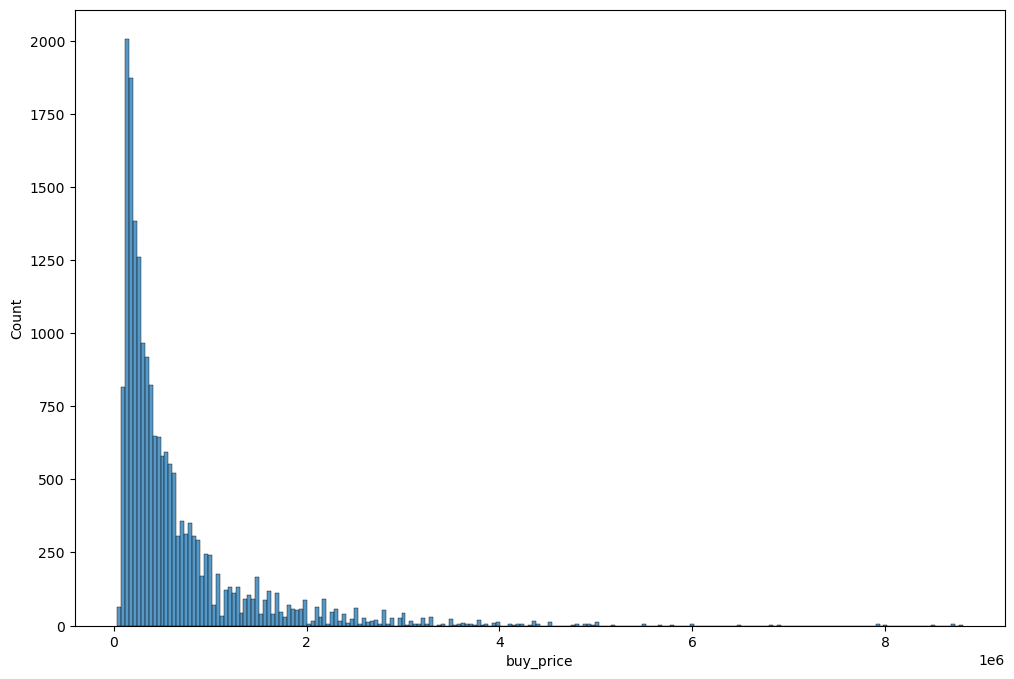

In [11]:
plt.figure(figsize=(12,8))
sns.histplot(df['buy_price']) #Plantearse descartar outliers para facilitar el entrenamiento de la red neuronal si suponen alta carga computacional o elevado error del modelo

In [12]:
#Alternativas a distplot
#sns.displot(df['buy_price'], kde=True)
#sns.histplot(df['buy_price'], kde=True)

In [12]:
df['n_rooms']

0        2
1        3
2        2
3        2
4        2
        ..
21736    2
21737    2
21738    2
21739    4
21740    4
Name: n_rooms, Length: 19310, dtype: int64

<Axes: xlabel='n_rooms', ylabel='count'>

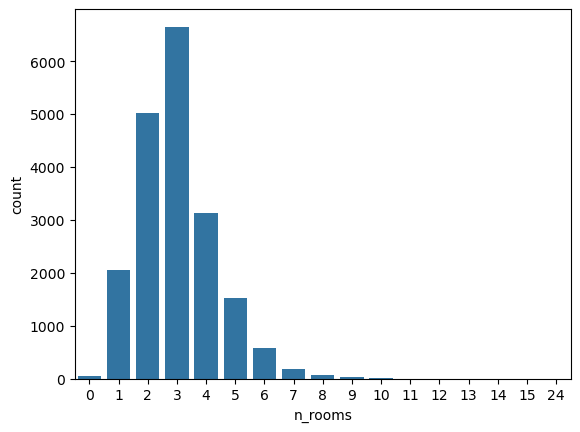

In [13]:
sns.countplot(x='n_rooms', data=df) #versiones recientes

In [14]:
df.corr(numeric_only = True)['buy_price'].sort_values() #Verificar qué variables tienen mayor correlación con la salida
#En caso de que haya un error al aplicar el método corr() sobre un dataframe por el hecho de que haya columnas no numéricas (depende de la versión de la librería Pandas), lo más sencillo es aplicar el método con la opción numeric_only=True:
#df.corr(numeric_only = True)

id                        -0.195828
is_floor_under            -0.149768
is_new_development        -0.013903
is_renewal_needed          0.052132
is_exact_address_hidden    0.167964
has_parking                0.315350
n_rooms                    0.578291
buy_price_by_area          0.581698
n_bathrooms                0.753692
sq_mt_built                0.831700
rent_price                 0.920350
buy_price                  1.000000
is_rent_price_known             NaN
is_buy_price_known              NaN
Name: buy_price, dtype: float64

In [16]:
#Visualizar variables altamente correladas con la salida

<Axes: xlabel='buy_price', ylabel='sq_mt_built'>

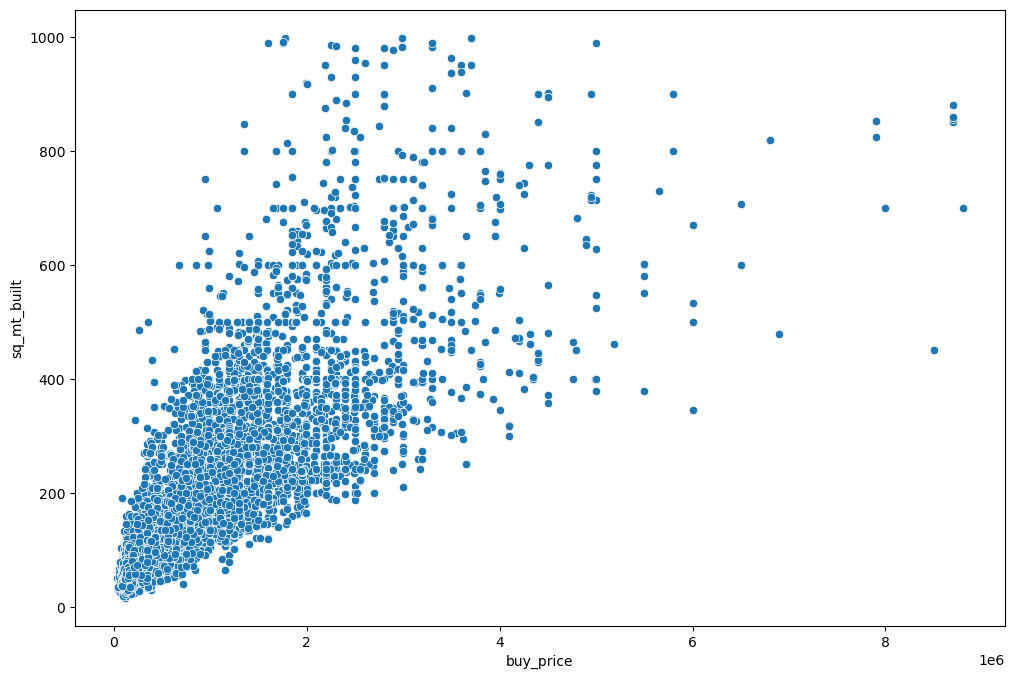

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='buy_price',y='sq_mt_built',data=df)

<Axes: xlabel='n_bathrooms', ylabel='buy_price'>

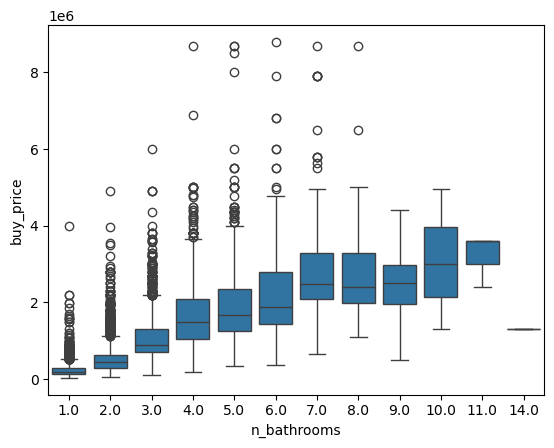

In [17]:
sns.boxplot(x='n_bathrooms',y='buy_price',data=df)

### 3.2.2 Plot geográficos

In [19]:
# Visualizar la información geográfica si estuviera completa, el ejemplo que hay a continuación proviende de una 
# fuente de datos alternativa: https://www.kaggle.com/harlfoxem/housesalesprediction

In [20]:
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='price',y='long',data=df)

In [21]:
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='price',y='lat',data=df)

In [22]:
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='long',y='lat',data=df,hue='price') #Representación con poco rango dinámico de colores debido a los outliers

In [23]:
#len(df)*(0.01) #número de muestras que sería el 1% de nuestros datos

In [24]:
#non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:] #estaríamos quitando el 1% de valores outliers

In [25]:
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='long',y='lat',
#                data=non_top_1_perc,hue='price',
#                palette='RdYlGn',edgecolor=None,alpha=0.2) 

### 3.2.3 Otras variables

<Axes: xlabel='has_parking', ylabel='buy_price'>

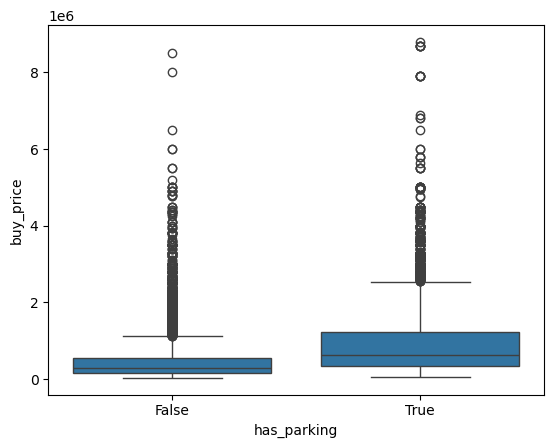

In [18]:
sns.boxplot(x='has_parking',y='buy_price',data=df)

## 3.3 Limpieza final

### 3.3.1 Eliminar columnas no correladas

In [27]:
# Objetivo: Eliminar variables que no tienen ninguna relación con la variable objetivo (precio) 
# o bien su información ya está incluida en otras variables - Aprovechar conocimiento del campo que estamos tratando

In [28]:
df.head()

,id,title,subtitle,sq_mt_built,n_rooms,n_bathrooms,is_exact_address_hidden,is_floor_under,neighborhood_id,operation,rent_price,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,energy_certificate,has_parking
0,21742,"Piso en venta en calle de Godella, 64","San CristÃ³bal, Madrid",64.0,2,1.0,False,0.0,Neighborhood 135: San CristÃ³bal (1308.89 â‚¬/...,sale,471.0,False,85000,1328,True,HouseType 1: Pisos,False,0.0,D,False
1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ãngeles, Madrid",70.0,3,1.0,True,0.0,Neighborhood 132: Los Ãngeles (1796.68 â‚¬/m2...,sale,666.0,False,129900,1856,True,HouseType 1: Pisos,True,0.0,en trÃ¡mite,False
2,21740,"Piso en venta en calle del Talco, 68","San AndrÃ©s, Madrid",94.0,2,2.0,False,0.0,Neighborhood 134: San AndrÃ©s (1617.18 â‚¬/m2)...,sale,722.0,False,144247,1535,True,HouseType 1: Pisos,False,0.0,no indicado,False
3,21739,Piso en venta en calle Pedro JimÃ©nez,"San AndrÃ©s, Madrid",64.0,2,1.0,True,1.0,Neighborhood 134: San AndrÃ©s (1617.18 â‚¬/m2)...,sale,583.0,False,109900,1717,True,HouseType 1: Pisos,False,0.0,en trÃ¡mite,False
4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,2,2.0,True,0.0,Neighborhood 133: Los Rosales (1827.79 â‚¬/m2)...,sale,1094.0,False,260000,2407,True,HouseType 1: Pisos,False,0.0,en trÃ¡mite,True


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19310 entries, 0 to 21740
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       19310 non-null  int64  
 1   title                    19310 non-null  object 
 2   subtitle                 19310 non-null  object 
 3   sq_mt_built              19310 non-null  float64
 4   n_rooms                  19310 non-null  int64  
 5   n_bathrooms              19310 non-null  float64
 6   is_exact_address_hidden  19310 non-null  bool   
 7   is_floor_under           19310 non-null  float64
 8   neighborhood_id          19310 non-null  object 
 9   operation                19310 non-null  object 
 10  rent_price               19310 non-null  float64
 11  is_rent_price_known      19310 non-null  bool   
 12  buy_price                19310 non-null  int64  
 13  buy_price_by_area        19310 non-null  int64  
 14  is_buy_price_known    

In [19]:
df = df.drop(['id','title','subtitle','is_exact_address_hidden','is_renewal_needed','neighborhood_id','operation','is_rent_price_known','is_buy_price_known','buy_price_by_area','is_buy_price_known','house_type_id','energy_certificate'],axis=1)

In [20]:
df.head()

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,rent_price,buy_price,is_new_development,has_parking
0,64.0,2,1.0,0.0,471.0,85000,0.0,False
1,70.0,3,1.0,0.0,666.0,129900,0.0,False
2,94.0,2,2.0,0.0,722.0,144247,0.0,False
3,64.0,2,1.0,1.0,583.0,109900,0.0,False
4,108.0,2,2.0,0.0,1094.0,260000,0.0,True


### 3.3.2 Limpieza temporal

In [32]:
#Importante visualizar la evolución temporal (si ha habido un importante cambio, quedarse con 
#la porción de datos que corresponde a la situación actual para mejorar la futura predicción)
#El ejemplo que hay a continuación proviende de una fuente de datos alternativa: https://www.kaggle.com/harlfoxem/housesalesprediction

In [33]:
#df['date'] = pd.to_datetime(df['date'])

In [34]:
#df['month'] = df['date'].apply(lambda date:date.month)

In [35]:
#df['year'] = df['date'].apply(lambda date:date.year)

In [36]:
#sns.boxplot(x='year',y='price',data=df)

In [37]:
#sns.boxplot(x='month',y='price',data=df)

In [38]:
#df.groupby('month').mean()['price'].plot()

In [39]:
#df.groupby('year').mean()['price'].plot()

In [40]:
#df = df.drop('date',axis=1) #La fecha no será una variable útil para el modelo

In [41]:
#df['sqft_basement'].value_counts()

### 3.3.3 Transformación variables categóricas

In [42]:
df.head()

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,rent_price,buy_price,is_new_development,has_parking
0,64.0,2,1.0,0.0,471.0,85000,0.0,False
1,70.0,3,1.0,0.0,666.0,129900,0.0,False
2,94.0,2,2.0,0.0,722.0,144247,0.0,False
3,64.0,2,1.0,1.0,583.0,109900,0.0,False
4,108.0,2,2.0,0.0,1094.0,260000,0.0,True


In [43]:
#Utilizar OneHotEncoder si variables categóricas (se obtiene una columna por cada categoría asignando 0 o 1) / Las variables booleanas no es necesario convertirlas True = 1 / False = 0
#from sklearn.preprocessing import OneHotEncoder
#oe_style = OneHotEncoder()
#oe_results = oe_style.fit_transform(df[["body_style"]]) #body_style sería la variable categórica
#pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()
#df = df.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))

# 4.Train Test Split

In [21]:
X = df.drop('buy_price',axis=1)
y = df['buy_price']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [24]:
X_train.shape

(15448, 7)

In [25]:
X_test.shape

(3862, 7)

# 5.Escalado

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
X_train

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,rent_price,is_new_development,has_parking
2160,87.0,2,1.0,0.0,913.0,0.0,False
13201,150.0,2,2.0,1.0,1839.0,0.0,True
14224,682.0,24,4.0,0.0,6864.0,0.0,False
17339,154.0,5,5.0,0.0,2510.0,0.0,False
5298,70.0,3,1.0,0.0,621.0,0.0,False
...,...,...,...,...,...,...,...
6473,67.0,2,1.0,0.0,762.0,0.0,False
9240,146.0,3,2.0,0.0,2070.0,1.0,True
19993,104.0,2,1.0,0.0,1890.0,0.0,False
20197,85.0,2,2.0,0.0,1197.0,0.0,False


In [29]:
X_train= scaler.fit_transform(X_train)

In [30]:
X_train

array([[0.07230143, 0.08333333, 0.        , ..., 0.07122394, 0.        ,
        0.        ],
       [0.13645621, 0.08333333, 0.07692308, ..., 0.14491485, 0.        ,
        1.        ],
       [0.67820774, 1.        , 0.23076923, ..., 0.54480344, 0.        ,
        0.        ],
       ...,
       [0.08961303, 0.08333333, 0.        , ..., 0.14897342, 0.        ,
        0.        ],
       [0.07026477, 0.08333333, 0.07692308, ..., 0.09382461, 0.        ,
        0.        ],
       [0.10183299, 0.08333333, 0.07692308, ..., 0.18040745, 0.        ,
        0.        ]])

In [31]:
X_test = scaler.transform(X_test)

In [32]:
X_train.shape

(15448, 7)

In [33]:
X_test.shape

(3862, 7)

# 6.Creación del modelo

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [35]:
model = Sequential()
#Añadir un número de neuronas similar al número de features en X_train - 7 en el ejemplo
num_neuronas = X_train.shape[1]
model.add(Dense(num_neuronas,activation='relu'))
model.add(Dense(num_neuronas,activation='relu'))
model.add(Dense(num_neuronas,activation='relu'))
model.add(Dense(num_neuronas,activation='relu'))
model.add(Dense(1)) # Indicar tantas neuronas de salida como variables a predecir, en este caso solo 1 variable "buy_price"

model.compile(optimizer='adam',loss='mse')

# 7. Entrenamiento del modelo

In [36]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values), #si indicamos validation_data en cada epoch calcula sobre el conjunto de test el resultado de pérdidas
          batch_size=128,epochs=200) #batch_size es el tamaño de datos que toma en cada cálculo (indicar potencia de 2) / epochs es el número de iteraciones sobre la red neuronal para ajustar los pesos (w) y bias (b)

Epoch 1/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 935847002112.0000 - val_loss: 850747457536.0000
Epoch 2/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 935822622720.0000 - val_loss: 850682511360.0000
Epoch 3/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 935600455680.0000 - val_loss: 850217795584.0000
Epoch 4/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 934530711552.0000 - val_loss: 848397598720.0000
Epoch 5/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 931215114240.0000 - val_loss: 843469160448.0000
Epoch 6/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 923286306816.0000 - val_loss: 832721584128.0000
Epoch 7/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 907612782592.0000 - val_loss: 812904153088.0000
Epoch 8/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 880719560704.0000 - val_loss: 780710772736.0000
Epoch 9/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 839365296128.0000 - val_loss: 733737451520.0000
Epoch 10/200
121/12

Epoch 198/200
121/121 [==============================] - 0s 875us/step - loss: 42737185708.0656 - val_loss: 36830838784.0000
Epoch 199/200
121/121 [==============================] - 0s 894us/step - loss: 41876250926.1639 - val_loss: 36763324416.0000
Epoch 200/200
121/121 [==============================] - 0s 858us/step - loss: 40782886307.6721 - val_loss: 36751556608.0000


In [37]:
losses = pd.DataFrame(model.history.history)

In [38]:
losses

,loss,val_loss
0,9.358470e+11,8.507475e+11
1,9.358226e+11,8.506825e+11
2,9.356005e+11,8.502178e+11
3,9.345307e+11,8.483976e+11
4,9.312151e+11,8.434692e+11
...,...,...
195,4.167338e+10,3.671235e+10
196,4.158417e+10,3.667462e+10
197,4.149796e+10,3.662827e+10
198,4.140383e+10,3.652171e+10


<Axes: >

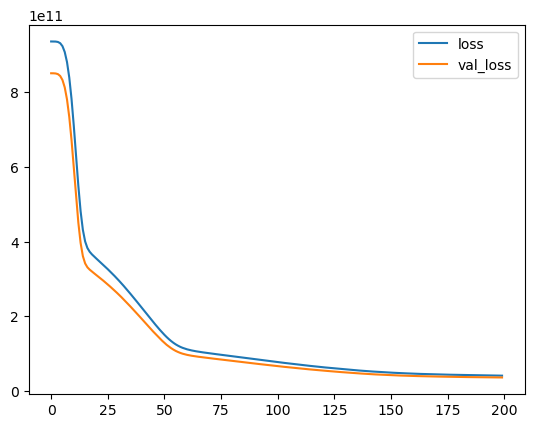

In [39]:
losses.plot()

# 8. Evaluación del modelo

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

## 8.1 Predicción sobre el conjunto de Test

In [41]:
X_test

array([[0.06313646, 0.125     , 0.        , ..., 0.05618335, 0.        ,
        0.        ],
       [0.13543788, 0.16666667, 0.07692308, ..., 0.15502149, 0.        ,
        1.        ],
       [0.04480652, 0.08333333, 0.        , ..., 0.04830495, 0.        ,
        0.        ],
       ...,
       [0.04480652, 0.04166667, 0.        , ..., 0.09605284, 0.        ,
        0.        ],
       [0.11608961, 0.16666667, 0.07692308, ..., 0.11037721, 0.        ,
        0.        ],
       [0.03665988, 0.04166667, 0.        , ..., 0.08141015, 1.        ,
        0.        ]])

In [42]:
predictions = model.predict(X_test)

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step


In [43]:
mean_absolute_error(y_test,predictions)

108173.1796875

In [44]:
np.sqrt(mean_squared_error(y_test,predictions))

np.float64(190912.1930941028)

In [45]:
explained_variance_score(y_test,predictions) #Calcula la covarianza en y_test (real) y la predicción, cuanto más cercano a 1 mejor (significa que conforme más aumenta o disminuye el valor real, más aumenta o disminuye el valor predecido)

0.9219314936176319

In [46]:
mean_absolute_error(y_test,predictions)/df['buy_price'].mean() #¿En qué porcentaje nos estamos equivaocando respecto al valor medio?

np.float64(0.17099982401675476)

In [47]:
mean_absolute_error(y_test,predictions)/df['buy_price'].median() #¿En qué porcentaje nos estamos equivaocando respecto al valor mediana?

0.28466626233552633

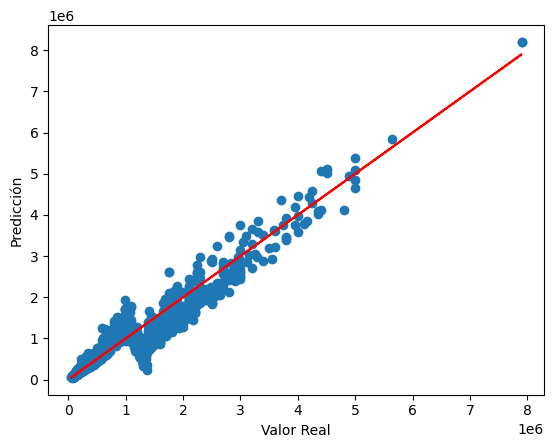

In [48]:
# Visualizar nuestra predicción
plt.scatter(y_test,predictions)
plt.xlabel("Valor Real")
plt.ylabel("Predicción")

# Predicción perfecta
plt.plot(y_test,y_test,'r')

In [49]:
errors = y_test.values.reshape(y_test.shape[0], 1) - predictions #rotar y_test para poder comparar con predictions

<Axes: ylabel='Count'>

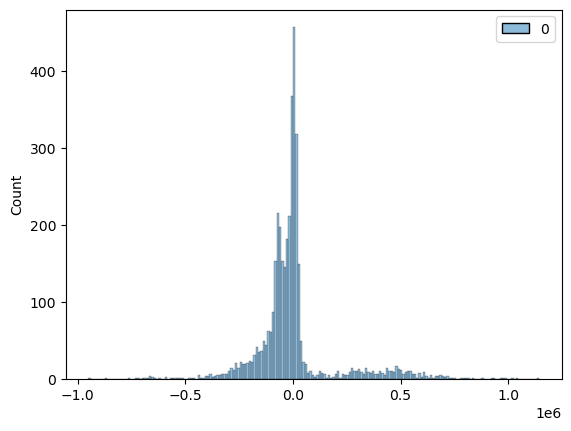

In [51]:
sns.histplot(errors) #Idealmente debe estar concentrado el error en 0

## 8.2 Predicción sobre nuevos datos

In [52]:
#Lectura datos a predecir
df_pred = pd.read_excel('./viviendas_Madrid.xlsx',sheet_name='Datos_Predecir')

In [53]:
df_pred = df_pred[df.columns] #Filtramos el dataframe predicción para quedarnos con las mismas columnas de interés que el df histórico
df_pred

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,rent_price,buy_price,is_new_development,has_parking
0,65,2,1.0,False,420,NaN,False,False
1,72,3,1.0,False,650,NaN,False,False
2,97,2,2.0,False,730,NaN,False,False
3,63,2,1.0,True,590,NaN,False,False
4,107,2,2.0,False,1000,NaN,False,True
5,125,4,2.0,False,890,NaN,False,True
6,130,5,2.0,False,885,NaN,False,True
7,135,3,2.0,False,912,NaN,False,False
8,76,3,2.0,False,970,NaN,False,True
9,87,2,1.0,False,701,NaN,False,False


In [54]:
X_pred = df_pred.drop('buy_price',axis=1) #Eliminamos la columna objetivo (vacía) si la hubiera en nuestro df con los datos a predecir
X_pred

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,rent_price,is_new_development,has_parking
0,65,2,1.0,False,420,False,False
1,72,3,1.0,False,650,False,False
2,97,2,2.0,False,730,False,False
3,63,2,1.0,True,590,False,False
4,107,2,2.0,False,1000,False,True
5,125,4,2.0,False,890,False,True
6,130,5,2.0,False,885,False,True
7,135,3,2.0,False,912,False,False
8,76,3,2.0,False,970,False,True
9,87,2,1.0,False,701,False,False


In [55]:
X_pred = scaler.transform(X_pred)
X_pred

array([[0.04989817, 0.08333333, 0.        , 0.        , 0.03199109,
        0.        , 0.        ],
       [0.05702648, 0.125     , 0.        , 0.        , 0.05029445,
        0.        , 0.        ],
       [0.08248473, 0.08333333, 0.07692308, 0.        , 0.05666083,
        0.        , 0.        ],
       [0.04786151, 0.08333333, 0.        , 1.        , 0.04551966,
        0.        , 0.        ],
       [0.09266802, 0.08333333, 0.07692308, 0.        , 0.07814738,
        0.        , 1.        ],
       [0.11099796, 0.16666667, 0.07692308, 0.        , 0.0693936 ,
        0.        , 1.        ],
       [0.11608961, 0.20833333, 0.07692308, 0.        , 0.0689957 ,
        0.        , 1.        ],
       [0.12118126, 0.125     , 0.07692308, 0.        , 0.07114436,
        0.        , 0.        ],
       [0.0610998 , 0.125     , 0.07692308, 0.        , 0.07575999,
        0.        , 1.        ],
       [0.07230143, 0.08333333, 0.        , 0.        , 0.05435302,
        0.        , 0. 

In [56]:
#Realizamos predicción
resultado = model.predict(X_pred)
resultado

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[ 63863.684],
       [118349.04 ],
       [221929.25 ],
       [120876.414],
       [326088.84 ],
       [282514.88 ],
       [272467.72 ],
       [304178.8  ],
       [268127.   ],
       [161709.45 ]], dtype=float32)

In [57]:
#Unimos en un dataframe los datos a predecir con su predicción
df_pred['PREDICCIÓN']=pd.DataFrame(resultado)
df_pred

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,rent_price,buy_price,is_new_development,has_parking,PREDICCIÓN
0,65,2,1.0,False,420,NaN,False,False,63863.683594
1,72,3,1.0,False,650,NaN,False,False,118349.039062
2,97,2,2.0,False,730,NaN,False,False,221929.250000
3,63,2,1.0,True,590,NaN,False,False,120876.414062
4,107,2,2.0,False,1000,NaN,False,True,326088.843750
5,125,4,2.0,False,890,NaN,False,True,282514.875000
6,130,5,2.0,False,885,NaN,False,True,272467.718750
7,135,3,2.0,False,912,NaN,False,False,304178.812500
8,76,3,2.0,False,970,NaN,False,True,268127.000000
9,87,2,1.0,False,701,NaN,False,False,161709.453125


In [58]:
#Guardar y cargar el modelo para posterior uso

In [59]:
from tensorflow.keras.models import load_model

In [61]:
model.save('modelo_pred_vivienda.keras')

In [163]:
#Cargar modelo para posterior uso

In [62]:
modelo_cargado = load_model('modelo_pred_vivienda.keras')

C:\Users\Iván Pinar\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
